## PROJET RAKUTEN

Ceci est notre notebook collectif pour le projet Rakuten:
Il permettra de rassembler nos codes ainsi que nos visualisations.

# Récupération des données et analyse exploratoire

---



## Chargement des données et librairies

In [ ]:
#Chargement des librairies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.models import Model, Sequential, load_model


In [ ]:
# montage du lecteur drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Projet DataScientest Rakuten')
#os.chdir('/content/drive/Sharedrives/Projet DataScientest Rakuten')

Mounted at /content/drive


In [ ]:
#Récupération des features
X_train=pd.read_csv('Data_sources/X_train.csv',index_col=0)
X_test=pd.read_csv('Data_sources/X_test.csv',index_col=0)
print('---Features---')
display(X_train.head())

# Récupération des targets.
y_train=pd.read_csv('Data_sources/Y_train.csv',index_col=0)
print('---Labels---')
display(y_train.head())

---Features---


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


---Labels---


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


## Analyse descriptive

In [ ]:
recheck_img_set=False  # Set as true to recheck full img set (long)

print("Taille de l'échantillon d'entrainement: {0} lignes".format(X_train.shape[0]))
print("Soit un total de {0} données.".format(X_train.size))

if recheck_img_set:
  print("Nombre d'images du dataset Train:",len(os.listdir('Data_sources/images/image_train')))
else:
  print("Nombre d'images du dataset Train:",84916)

print("\nTaille de l'échantillon de test: {0} lignes".format(X_test.shape[0]))
print("Soit un total de {0} données.".format(X_test.size))

if recheck_img_set:
  print("Nombre d'images du dataset Train:",len(os.listdir('Data_sources/images/image_train')))
else:
  print("Nombre d'images du dataset Train:",13812)


Taille de l'échantillon d'entrainement: 84916 lignes
Soit un total de 339664 données.
Nombre d'images du dataset Train: 84916

Taille de l'échantillon de test: 13812 lignes
Soit un total de 55248 données.
Nombre d'images du dataset Train: 13812


On remarque que la quantité d'images correspond bien aux tailles des data sets.
Nous pouvons donc présumer que le data set est complet

In [ ]:
#Check that no columns except description get nas

print('--------data_set without description ')
print('Xtrain: {0} values'.format(X_train['description'].isna().sum()))
print('Xtest : {0} values'.format(X_test['description'].isna().sum()))

print('\n--------data_set with data missing (other than description)')
print('Xtrain: {0} values'.format(X_train.drop(columns=['description']).isna().any(axis=1).sum()))
print('Xtest : {0} values'.format(X_test.drop(columns=['description']).isna().any(axis=1).sum()))

--------data_set without description 
Xtrain: 29800 values
Xtest : 4886 values

--------data_set with data missing (other than description)
Xtrain: 0 values
Xtest : 0 values


Les data sets sont propres et ne présentent aucun NA. (autre que description)
il y'a 29800 descriptions manquantes dans le data set d'entrainement et 4886 sur les données de test


**Analyse des labels**

In [ ]:
c_product=pd.read_csv('Data_sources/classes produits.csv')
#To do: Lien propre avec classes

Nombre de classes "prdtypecode": prdtypecode    27
dtype: int64
Affichage des classes par répartition


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


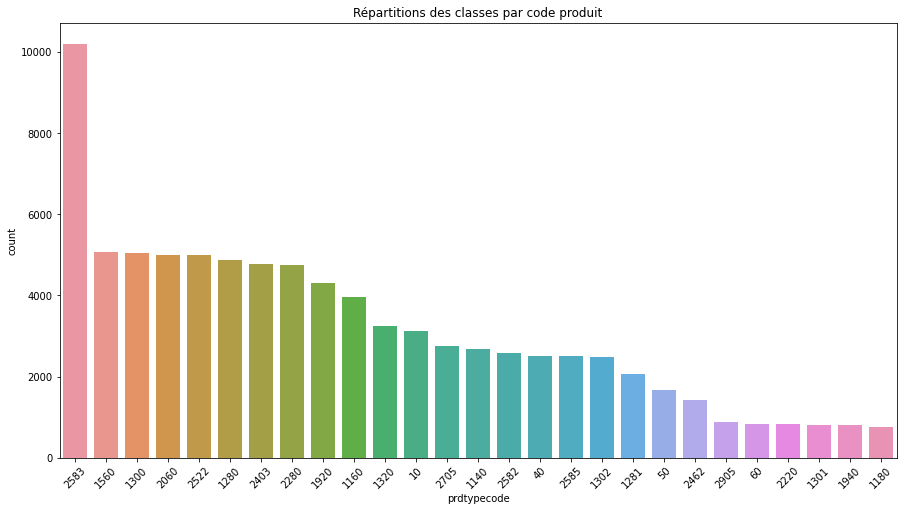

In [ ]:
print('Nombre de classes "prdtypecode":', y_train.nunique())
print('Affichage des classes par répartition')

plt.figure(figsize=(15,8))
ax=sns.countplot(y_train['prdtypecode'],order=y_train['prdtypecode'].value_counts().index)
plt.title('Répartitions des classes par code produit')
plt.xticks(rotation=45);
plt.savefig('Output/Classes_par_code_produit.png')

## Analyse lexicale

**convertir les chaines html en chaines normales (unicode)**


In [ ]:
import re
from html.entities  import codepoint2name, name2codepoint
from wordcloud import WordCloud

def html2txt(html):
    """convertit la chaine html en chaine normale (unicode)
    """
    # Commencer paar remplacer les espaces
    html = re.sub("&nbsp;", u" ", html)

    motif = '&(%s);' % ('|'.join(name2codepoint))
    rempl = lambda m: chr(name2codepoint[m.group(1)])
    return re.sub(motif, rempl, html)

# Supprimer les balises html
def cleanhtml(html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', html)
  return ''.join(cleantext)

def word_cloud_cat(liste_mots_cat):
  wc = WordCloud(background_color ='black', max_words = 100, stopwords= stop_words, max_font_size= 50, random_state=42)
  plt.figure(figsize= (12,8))

  wc.generate(''.join(liste_mots_cat)) 
  plt.imshow(wc) 
  
  plt.show()

In [ ]:
X_train['description_ok'] = X_train['description'].fillna('')
X_train['text_tag'] = X_train.apply(lambda row: row['designation'] + row['description_ok'], axis=1)
X_train['text'] = X_train['text_tag'].apply(html2txt).apply(cleanhtml)

In [ ]:
X_train['text']

0        Olivia: Personalisiertes Notizbuch / 150 Seite...
1        Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2        Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3        Peluche Donald - Europe - Disneyland 2000 (Mar...
4        La Guerre Des TuquesLuc a des idées de grandeu...
                               ...                        
84911                          The Sims [ Import Anglais ]
84912    Kit piscine acier NEVADA déco pierre Ø 3.50m x...
84913    Journal Officiel De La Republique Francaise N°...
84914    Table Basse Bois De Récupération Massif Base B...
84915    Gomme De Collection 2 Gommes Pinguin Glace Ver...
Name: text, Length: 84916, dtype: object

**Affichage de WordCloud pour chaque categorie**

In [ ]:
pip install swifter # (Besoin qu'une seule fois)

In [ ]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import swifter

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = stopwords.words(['french', 'english'])

In [ ]:
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]

    return ' '.join(mots).strip()

In [ ]:
X_train['text2'] = X_train.text.swifter.apply(lambda x :preprocess_sentence(x))
# sinon ca fait un min bug

Pandas Apply:   0%|          | 0/84916 [00:00<?, ?it/s]

In [ ]:
# X_train['abc'] = X_train.text.swifter.apply(lambda x :preprocess_sentence(x))

In [ ]:
# index=2
# print('___________designation___________\n',X_train.iloc[index]['designation'])
# print('___________description___________\n',X_train.iloc[index]['description'])
# print('___________description_ok________\n',X_train.iloc[index]['description_ok'])
# print('___________text_tag______________\n',X_train.iloc[index]['text_tag'])
# print('___________text__________________\n',X_train.iloc[index]['text'])
# print('___________abc___________________\n',X_train.iloc[index]['abc'])

In [ ]:
dict_code_to_id = {}
dict_id_to_code={}

list_tags = list(y_train['prdtypecode'].unique())

for i,tag in enumerate(list_tags):
    dict_code_to_id[tag] = i 
    dict_id_to_code[i]=tag
    
y_train['label'] = y_train['prdtypecode'].map(dict_code_to_id)


In [ ]:
# dict_code_to_id


In [ ]:
# df = pd.concat([X_train.text2,y_train], axis=1)
# df.head()

# df_cat1= df[df.label ==2]

# txt = ""
# for ch in df_cat1['text']:
#   txt+= ' ' + ch
# word_cloud_cat(txt)
/ #FAIRE UNE FONCTION

KeyError: ignored

##Analyse des dossiers images##

In [ ]:
#fonction pour accéder facilement aux répertoire image
def get_img_path(img_id,product_id,train=True):
    source_path='Data_sources/images/'
    subfold='image_train/'
    if not train: subfold='image_test/'        
    ext='.jpg'
    img_code='image_{0}_product_{1}'.format(img_id,product_id)
    return source_path+subfold+img_code+ext

In [ ]:
# récupération de 3 images du training set (au hasard) 
indexes=np.random.randint(0,X_test.shape[0],3)

#==> permet de récupérer plusieurs paths
#img_list=list(X_train.iloc[indexes].apply(lambda x: get_img_path(x['imageid'],x['productid']),axis=1))

Produit: Xbox One 500 Giga Avc 3jeux Une Manette
Description : nan
Image :


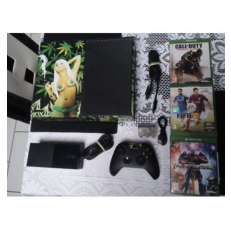

Produit: Micro Voiture De Course Galoob-Galoob
Description : nan
Image :


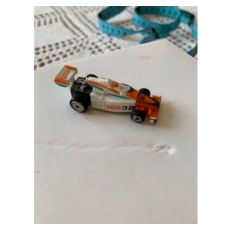

Produit: Schneider Lot De 3 Stylos Feutre Fibre Combinable Link-It 1.0 Orange
Description : nan
Image :


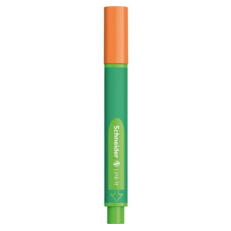

In [ ]:
for index in indexes[:10]:
    #iloc[0]==> pour faire 'sauter l'index initial et ne récupérer que le résultat'
    im_path=X_train.iloc[[index]].apply(lambda x: get_img_path(x['imageid'],x['productid']),axis=1).iloc[0]
    plt.imshow(imread(im_path))
    plt.axis('off');
    print('Produit:',X_train.iloc[index]['designation'])
    print('Description :',X_train.iloc[index]['description'])
    print('Image :')
    plt.show()


# Entrainement de Modeles en Transfer Learning

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

X_train['path'] = X_train.apply(lambda row: get_img_path(row['imageid'], row['productid']), axis = 1)

X_feats, X_test, y_feats, y_test = train_test_split(X_train, y_train['label'], test_size = 0.1, random_state=1234, stratify=y_train['label'])
X_train, X_val, y_train, y_val = train_test_split(X_feats, y_feats, test_size = 0.2, random_state=1235, stratify=y_feats)

X_train_path, X_val_path, X_test_path = X_train['path'], X_val['path'], X_test['path']

In [ ]:
X_train_dataFrame = pd.DataFrame(X_train_path, columns=['path'])
X_train_dataFrame['label'] = y_train
X_train_dataFrame['label'] = X_train_dataFrame['label'].astype('string')

X_val_dataFrame = pd.DataFrame(X_val_path, columns=['path'])
X_val_dataFrame['label'] = y_val
X_val_dataFrame['label'] = X_val_dataFrame['label'].astype('string')

In [ ]:
# 32, 64
BATCH_SIZE = 32
# 0.01, 0.001
LEARNING_RATE = 0.01  

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 1.1,
        horizontal_flip = True
        )

val_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)

In [ ]:
train_generator=train_data_generator.flow_from_dataframe(
    dataframe=X_train_dataFrame,
    directory=None,
    x_col="path",
    y_col="label",
    
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="sparse",
    target_size=(128,128))

Found 61139 validated image filenames belonging to 27 classes.


In [ ]:
val_generator=val_data_generator.flow_from_dataframe(
    dataframe=X_val_dataFrame,
    directory=None,
    x_col="path",
    y_col="label",
    
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="sparse",
    target_size=(128,128))

Found 15285 validated image filenames belonging to 27 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

MODEL_BASE = 'Output/'
MODEL_JSON = ''
MODEL_H5 = ''

################################################################################
# ResNet50, VGG16, MobileNetV2
IMAGE_ALGO = 'ResNet50'

# 1
if IMAGE_ALGO == 'ResNet50':
    # Chargement du modèle
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))

    MODEL_JSON = MODEL_BASE + 'classifierTranferLearningResNet50.json'
    MODEL_H5 = MODEL_BASE + 'classifierTranferLearningResNet50.h5'

    # Bloquage du blackbone
    for layer in base_model.layers:
        #print("layer.name: ", layer.name)
        layer.trainable = False

    base_model.summary()

# 2
if IMAGE_ALGO == 'VGG16':
    # Modèle VGG16
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

    MODEL_JSON = MODEL_BASE + 'classifierTranferLearningVGG16.json'
    MODEL_H5 = MODEL_BASE + 'classifierTranferLearningVGG16.h5'

    # Bloquage du blackbone
    for layer in base_model.layers:
        layer.trainable = False

    base_model.summary()

# 3
if IMAGE_ALGO == 'MobileNetV2':
    # Modèle MobileNetV2
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))

    MODEL_JSON = MODEL_BASE + 'classifierTranferLearning'+ IMAGE_ALGO + '.json'
    MODEL_H5 = MODEL_BASE + 'classifierTranferLearning'+ IMAGE_ALGO + '.h5'

    # Bloquage du blackbone
    for layer in base_model.layers:
        layer.trainable = False

    base_model.summary()

94781440/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.models import Model, Sequential, load_model

model = Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(27, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [ ]:
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras import callbacks

# Savegarde automatique des poids
checkpoint = callbacks.ModelCheckpoint(filepath='Output/checkpointResNet50', 
                                       monitor='val_loss',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='min',
                                       save_freq='epoch')

# Réduction automatique du taux d'apprentissage
lr_plateau = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                         patience=3,
                                         factor= LEARNING_RATE,
                                         verbose=2,
                                         mode='min')

In [ ]:
history = model.fit_generator(generator=train_generator,
                                epochs=3,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                validation_data=val_generator,
                                validation_steps=val_generator.n//val_generator.batch_size,
                                callbacks=[lr_plateau] # checkpoint
                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
  11/1910 [..............................] - ETA: 5:43:10 - loss: 3.7769 - accuracy: 0.1222

KeyboardInterrupt: ignored

In [ ]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

In [ ]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy per epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.show()

In [ ]:
# On ajuste les poids de quelques couches du modele pré-entrainé choisi

if IMAGE_ALGO == 'ResNet50':
    for layer in base_model.layers[-10:]:
        print("layer name: ", layer.name)
        layer.trainable = True

if IMAGE_ALGO == 'VGG16':
    for layer in base_model.layers[-4:]:
        print("layer name: ", layer.name)
        layer.trainable = True

if IMAGE_ALGO == 'MobileNetV2':
    for layer in base_model.layers[-11:-3]:
        print("layer name: ", layer.name)
        layer.trainable = True

In [ ]:
model.summary()

In [ ]:
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_bis = model.fit_generator(generator=train_generator, 
                                epochs=10,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                validation_data=val_generator,
                                validation_steps=val_generator.n//val_generator.batch_size,
                                callbacks=[lr_plateau] # checkpoint
                                )

In [ ]:
train_loss = history_bis.history["loss"]
val_loss = history_bis.history["val_loss"]

train_acc = history_bis.history["accuracy"]
val_acc = history_bis.history["val_accuracy"]

In [ ]:
plt.figure(figsize = (20, 8))

plt.subplot(121)

plt.plot(train_loss)
plt.plot(val_loss)

plt.title('Model loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)

plt.plot(train_acc)
plt.plot(val_acc)

plt.title('Model accuracy per epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.show()

In [ ]:
# Prediction
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

X_test_dataFrame = pd.DataFrame(X_test_path, columns=['path'])

test_generator=test_data_generator.flow_from_dataframe(
    dataframe=X_test_dataFrame,
    directory=None,
    x_col="path",
    y_col=None,

    batch_size=64,
    shuffle=False,
    class_mode=None,
    target_size=(128,128))

Found 8489 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 3 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
# Probabilités renvoyées par le modèle
test_generator.reset()
y_prob = model.predict_generator(test_generator, verbose=1, steps=(test_generator.n//test_generator.batch_size) +1)

In [ ]:
predicted_class_indices=np.argmax(y_prob, axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy :', accuracy_score(y_test, predicted_class_indices))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print('Confusion Matrix')
print(confusion_matrix(y_test, predicted_class_indices))

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, predicted_class_indices))

In [ ]:
# Save model
model_json = model.to_json()

with open(MODEL_JSON, "w") as json_file:
    json_file.write(model_json)

model.save_weights(MODEL_H5, save_format='h5')

In [ ]:
######

In [ ]:
##############################################
# Load model
from tensorflow import keras
from keras.models import model_from_json

with open(MODEL_JSON, 'r') as fx:
    model_json_string = fx.read()

reconstructed_model_image = model_from_json(model_json_string)
reconstructed_model_image.load_weights(MODEL_H5)

In [ ]:
test_generator.reset()
reconstructed_y_prob = reconstructed_model_image.predict_generator(generator=test_generator, verbose=1, steps=(test_generator.n//test_generator.batch_size) + 1)

reconstructed_predicted_class_indices = np.argmax(reconstructed_y_prob, axis=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


133/133 [==============================] - 2228s 17s/step


In [ ]:
print(confusion_matrix(y_test, reconstructed_predicted_class_indices))

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy :', accuracy_score(y_test, reconstructed_predicted_class_indices))

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, reconstructed_predicted_class_indices))

# Entrainement RNN - Word Embeding

## Processing

In [ ]:
#Récupérer les infos depuis le dataset pré_traité!!!

In [ ]:
X_train.text = X_train.text.swifter.apply(lambda x :preprocess_sentence(x))
X_train.text.head(10)
X_val.text = X_val.text.swifter.apply(lambda x :preprocess_sentence(x))
X_val.text.head(10)




Pandas Apply:   0%|          | 0/84916 [00:00<?, ?it/s]

NameError: ignored

In [ ]:
import tensorflow as tf

# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)

# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_train.text)

In [ ]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

In [ ]:
vocab_size

10000

In [ ]:
# on transforme les textes en séquence d'entiers
X_train.sequences = tokenizer.texts_to_sequences(X_train.text)
X_val.sequences = tokenizer.texts_to_sequences(X_val.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
#list = [liste1, .... listeN]
#np.mean(X_train.sequences.apply(lambda x: len(x)))
#sequences = X_train.sequences.apply(lambda x: len(x)).mean(axis=0)

sequences = [len(x) for x in X_train.sequences]
moy_sequences = np.mean(sequences)

In [ ]:
# Resultat => Tableau numpy de 500 colonnes
# A voir avec la taille des sequences!!!
maxlen = moy_sequences #500

X_train.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_train.sequences, maxlen=maxlen, padding='post')
X_val.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_val.sequences, maxlen=maxlen, padding='post')

## Définition du modèle

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, Dropout

#embedding_dim = 200
embedding_dim = 300

model_text = Sequential()

model_text.add(Embedding(10000, embedding_dim))
#model_text.add(RNN(GRUCell(128), return_sequences=True))
model_text.add(RNN(GRUCell(256), return_sequences=True))

model_text.add(Dropout(0.3))

model_text.add(GlobalAveragePooling1D())

#model_text.add(Dense(256, activation='relu'))
model_text.add(Dense(128, activation='relu'))
model_text.add(Dropout(0.3))

model_text.add(Dense(27, activation='softmax'))

model_text.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         2000000   
                                                                 
 rnn (RNN)                   (None, None, 128)         126720    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [ ]:
model_text.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_text = model_text.fit(X_train.sequences, y_train.values,
                    batch_size = 64,
                    epochs=10,
                    validation_data = [X_val.sequences, y_val.values])

Epoch 1/10
189/956 [====>.........................] - ETA: 15:39 - loss: 3.0251 - accuracy: 0.1342

In [ ]:
#model.evaluate(X_test, y_val.values, batch_size=128, return_dict=True)
X_test.sequences = tokenizer.texts_to_sequences(X_test.text)
X_test.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_test.sequences, maxlen=48, padding='post')

## Evaluation

In [ ]:
model_text.evaluate(X_test.sequences, y_test.values, batch_size=64, return_dict=True)

In [ ]:
y_predicted_text = model_text.predict(X_test.sequences)

In [ ]:
text_predicted_class_indices = np.argmax(y_predicted_text, axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(confusion_matrix(y_test.values, text_predicted_class_indices))

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test.values, text_predicted_class_indices))

In [ ]:
# Save model
model_text.save('Output/textClassifierRNNBow.h5', save_format='h5')

In [ ]:
#######

In [ ]:
# Load model
from tensorflow import keras

reconstructed_text_model = keras.models.load_model("Output/textClassifierRNNBow.h5")

In [ ]:
reconstructed_text_model.evaluate(X_test.sequences, y_test.values, batch_size=128, return_dict=True)

67/67 [==============================] - 11s 152ms/step - loss: 8.8906 - accuracy: 0.1340


{'accuracy': 0.1340084820985794, 'loss': 8.890604019165039}

# Bac à sable


In [ ]:
words=X_train['description'].dropna().str.split(' ', expand=True).stack().reset_index(drop=True)

In [ ]:
count_words=words.value_counts()


une analyse rapide nout permet d'identifier que les mots que nous retrouvons le plus dans les descriptions sont piscine, couleur, qualité .....
Ce résultat est cohérent avec le fait que le code produit #2583 est relatif aux produits de piscine.

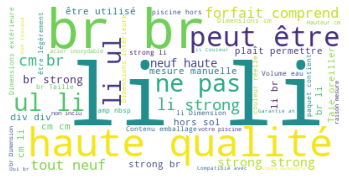

In [ ]:
from wordcloud import WordCloud
exclure_mots = ['d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 50).generate(' '.join(np.array(words)))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
descr_len=X_train['description'].dropna().map(lambda x: len(x))

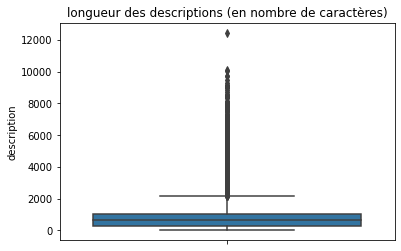

In [ ]:
sns.boxplot(y=descr_len)
plt.title('longueur des descriptions (en nombre de caractères)');

In [ ]:
#description la plus longue à traiter
X_train.loc[descr_len.idxmax()]['description']

'Lumineux Pvc Téléphone mobile Sac étanche caméra piscine Caractéristiques de couverture imperméable: Taille: 20.5x11cm Couleur: jaune violet vert blanc bleu noir rose Matière: PVC Durabilité - Conçu pour protéger votre téléphone le matériau de ce cas est entièrement protégé. Le capot est durable et peut être utilisé jusqu&#39;à 30 mètres. Il a également imperméabilise confortablement votre téléphone sans endommager la température de l&#39;eau jusqu&#39;à 50 degrés Celsius. Stylisme - Le cas de téléphone peut exprimer un sens du style pour beaucoup de gens. Ce cas garantit que vous pouvez retirer votre téléphone à tout moment et faire de votre téléphone sur. Le cas de téléphone contient également quatre éléments dans son emballage. effets fluorescents ces couleurs varient vous permettant de choisir parmi une large gamme de housses en fonction de votre thème de jour. Facile à utiliser - Le téléphone est très pratique donc le cas de téléphone d&#39;un téléphone devrait aider à conduire l



```
# Récupértration des codes de calsse produit
```



In [ ]:
# c_product=pd.read_csv('Annexes/classes produits.txt',sep='\t', error_bad_lines=False)
# c_product.to_csv('Data_sources/classes produits.csv',index=False)

,prdtypecode,prdtypecategory,prdtypegroup
0,2583,Accessoires piscine et spa,0
1,1560,mobilier d'intérieur,0
2,1300,Modélisme,0
3,2060,Eclairage et décoration,0
4,2522,Papeterie,0
5,1280,Jouets,0
6,2403,Magazines et revues,1
7,2280,Archives journaux et presse,1
8,1920,Linge de maison,0
9,1160,Cartes à échanger,0


In [ ]:
#?? Pourqoui puériculture/billard?????
#?? Pourquoi  purifieur air, parure lit bebe, sac a dos??
# Gros travail à faire sur les différentes classses
indexes=y_train[y_train['prdtypecode']==1301].index

# Not Used

In [ ]:
##############################################
# Not Used
@tf.function
def load_image(filepath, resize=(128, 128)):  
    im = tf.io.read_file(filepath)
    im = tf.image.decode_png(im, channels=3)
    return tf.image.resize(im, resize)

dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))
dataset_train = dataset_train.map(lambda x, y : [load_image(x), y], num_parallel_calls=-1).batch(32)

############
from tqdm import tqdm

X_test = []
for filepath in tqdm(X_test_path):
    # Lecture du fichier
    im = tf.io.read_file(filepath)
    # On décode le fichier
    im = tf.image.decode_jpeg(im, channels=3)
    # Redimensionnement
    im = tf.image.resize(im, size=(128, 128))
    
    X_test.append([im])
    
X_test = tf.concat(X_test, axis=0)

  0%|          | 0/8492 [02:00<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

# Chargement du modèle efficientNet
#base_model = EfficientNetB1(include_top=False, input_shape=(128,128,3))

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3)) 

# Bloquage du blackbone
for layer in base_model.layers:
    layer.trainable = False
    
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.models import Model, Sequential, load_model

model = Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(27, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [ ]:
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

NameError: ignored

In [ ]:
from tensorflow.keras import callbacks

# Savegarde automatique des poids
checkpoint = callbacks.ModelCheckpoint(filepath='checkpointVGG16', 
                                       monitor='val_loss',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='min',
                                       save_freq='epoch')

# Réduction automatique du taux d'apprentissage
lr_plateau = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                         patience=3,
                                         factor=0.1,
                                         verbose=2,
                                         mode='min')

In [ ]:
model.fit(dataset_train, epochs=5, validation_data=(X_test, y_test), callbacks=[lr_plateau, checkpoint])

Epoch 1/5
 759/2389 [========>.....................] - ETA: 2:08:35 - loss: 2.3838 - accuracy: 0.3594

In [ ]:
# Probabilités renvoyées par le modèle
y_prob = model.predict(X_test, batch_size=64)

# Prédiction de la classe
y_pred = tf.argmax(y_prob, axis=-1).numpy()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Accuracy :', accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)